In [5]:
from google.colab import drive
# drive.mount('/content/drive')

In [9]:
import pandas as pd
import numpy as np 
from numpy.core.defchararray import add

In [10]:
df = pd.read_csv("drive/MyDrive/dami/fraud_detection_train.csv")

In [11]:
# melihat ukuran data
df.shape

(200217, 53)

In [ ]:
# melihat type atribut
df.info()

In [12]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
# checking missing value
df.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

In [14]:
# check missing value
df.isna().sum

<bound method DataFrame.sum of         visit_id   kdkc  dati2  ...  proce00_e99  procv00_v89  label
0          False  False  False  ...        False        False  False
1          False  False  False  ...        False        False  False
2          False  False  False  ...        False        False  False
3          False  False  False  ...        False        False  False
4          False  False  False  ...        False        False  False
...          ...    ...    ...  ...          ...          ...    ...
200212     False  False  False  ...        False        False  False
200213     False  False  False  ...        False        False  False
200214     False  False  False  ...        False        False  False
200215     False  False  False  ...        False        False  False
200216     False  False  False  ...        False        False  False

[200217 rows x 53 columns]>

In [ ]:
#Data Preprocessing
#Lakukanla imputasi data dengan nilai mean jika terdapat nilai null (jika tidak ada 
#null, tunjukkan pada program anda).
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
Float = (df.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


In [15]:
df.drop(['visit_id'], axis=1, inplace=True)

In [16]:
df['jkpst'].replace(to_replace=['L', 'P'], value =[0, 1], inplace=True)

In [17]:
from numpy.core.defchararray import add
# bpjs_data with numeric data type
data_num = df.select_dtypes(include=[np.number])

# bpjs_data with category data type
data_cat = df.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [18]:
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
bpjs_data_final = pd.concat([data_cat, data_num], axis=1)
bpjs_data_final.drop(['new'], axis=1, inplace=True)

In [19]:
bpjs_data_final

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,typeppk_KC,typeppk_KG,typeppk_KI,typeppk_KJ,typeppk_KL,typeppk_KM,typeppk_KO,typeppk_KP,typeppk_KT,typeppk_KU,typeppk_SA,typeppk_SB,typeppk_SC,typeppk_SD,cmg_B,cmg_C,cmg_D,cmg_E,cmg_F,cmg_G,cmg_H,cmg_I,cmg_J,cmg_K,cmg_L,cmg_M,cmg_N,cmg_O,cmg_P,cmg_Q,...,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
200213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200215,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
data = bpjs_data_final

In [21]:
#Feature selection sebelum dinormalisasi
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# data.drop(['label'], axis=1, inplace=True)
x = data.iloc[:, 0:114]
y = data.iloc[:, -1]

bestfeatures = SelectKBest(score_func=chi2 ,k = 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

          Specs        Score
66         kdkc  9795.662620
67        dati2  8669.031951
71          los  7942.436161
30        cmg_H   912.991703
111   proc80_99   560.776145
69         umur   528.046221
22   typeppk_SC   525.150993
37        cmg_O   507.100557
101   proc39_45   395.828015
2    typeppk_D    387.365688


In [22]:
# split features (X) and label (y)
X = bpjs_data_final.iloc[:,:-1].values
y = bpjs_data_final.iloc[:, -1].values

In [23]:
# standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)
print(X)

[[-0.4873673  -0.51753857 -0.17502359 ... -0.65076355 -0.09649292
   0.        ]
 [-0.4873673   1.93222313 -0.17502359 ...  2.42227887 -0.09649292
   0.        ]
 [ 2.05184056 -0.51753857 -0.17502359 ... -0.65076355 -0.09649292
   0.        ]
 ...
 [-0.4873673  -0.51753857 -0.17502359 ... -0.65076355 -0.09649292
   0.        ]
 [ 2.05184056 -0.51753857 -0.17502359 ...  0.11749706 -0.09649292
   0.        ]
 [-0.4873673  -0.51753857 -0.17502359 ... -0.65076355 -0.09649292
   0.        ]]


In [25]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.17391304 0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.04347826 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [26]:
#Feature selection setelah dinormalisasi
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# data.drop(['label'], axis=1, inplace=True)
# x = data.iloc[:, 0:114]
y = data.iloc[:, -1]

bestfeatures = SelectKBest(score_func=chi2 ,k = 10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

         Specs       Score
30       cmg_H  912.991703
22  typeppk_SC  525.150993
37       cmg_O  507.100557
2   typeppk_D   387.365688
1   typeppk_C   383.221918
13  typeppk_KJ  363.563355
15  typeppk_KM  320.520873
42       cmg_U  303.946306
31       cmg_I  238.885527
70   jnspelsep  187.229917


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_new=SelectKBest(score_func=chi2,k=5).fit_transform(X,y)
X_new

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
#i.Lakukanla pembagian data: training data (80%) dan testing data (20%).
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
MCC_scorer = make_scorer(matthews_corrcoef)
pipeline_rf = Pipeline([
                ( 'model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer,
                       n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
grid_rf.best_score_

0.08959021437334048

In [ ]:
grid_rf.best_params_

{'model__n_estimators': 75}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [ ]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

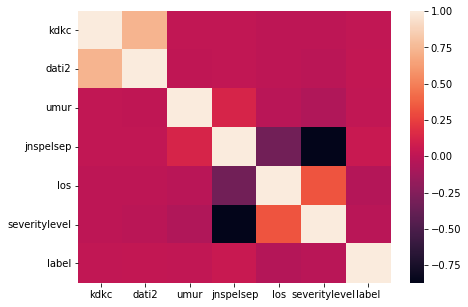

In [ ]:
## Tampilkanla correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

atribut = ['kdkc', 'dati2',  'umur', 'jnspelsep', 'los', 'severitylevel', 'label']
correlations = bpjs_data_final[atribut].corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

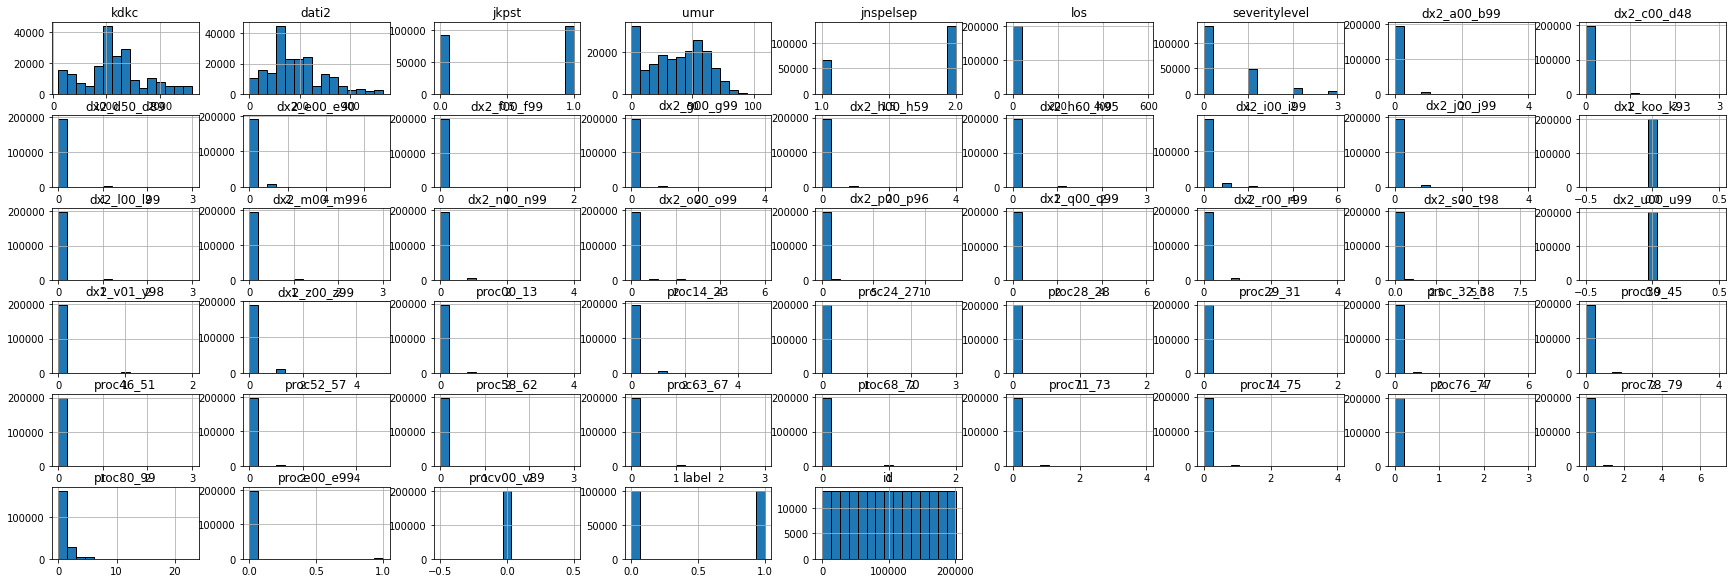

In [ ]:
## Tampilkan histogram untuk semua atribut
df.hist(edgecolor = 'black', bins = 15, figsize = (30, 15), layout = (9, 9));